In [ ]:
DESCRIPTION

Background of Problem Statement :

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

Problem Objective :

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

Domain: Entertainment

Analysis Tasks to be performed:

Import the three datasets
Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
User Age Distribution
User rating of the movie “Toy Story”
Top 25 movies by viewership rating
Find the ratings for all the movies reviewed by for a particular user of user id = 2696
Feature Engineering:
            Use column genres:

Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
Determine the features affecting the ratings of any particular movie.
Develop an appropriate model to predict the movie ratings
Dataset Description :

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

Ratings.dat
    Format - UserID::MovieID::Rating::Timestamp

Field	Description
UserID	Unique identification for each user
MovieID	Unique identification for each movie
Rating	User rating for each movie
Timestamp	Timestamp generated while adding user review
UserIDs range between 1 and 6040 
The MovieIDs range between 1 and 3952
Ratings are made on a 5-star scale (whole-star ratings only)
A timestamp is represented in seconds since the epoch is returned by time(2)
Each user has at least 20 ratings
 

Users.dat
Format -  UserID::Gender::Age::Occupation::Zip-code

Field	Description
UserID	Unique identification for each user
Genere	Category of each movie
Age	User’s age
Occupation	User’s Occupation
Zip-code	Zip Code for the user’s location
All demographic information is provided voluntarily by the users and is not checked for accuracy. Only users who have provided demographic information are included in this data set.

Gender is denoted by an "M" for male and "F" for female
Age is chosen from the following ranges:
 

Value	Description
1	"Under 18"
18	"18-24"
25	"25-34"
35	"35-44"
45	"45-49"
50	"50-55"
56	"56+"
 

Occupation is chosen from the following choices:
Value
 	Description
0	"other" or not specified
1	"academic/educator"
2	"artist”
3	"clerical/admin"
4	"college/grad student"
5	"customer service"
6	"doctor/health care"
7	"executive/managerial"
8	"farmer"
9	"homemaker"
10	"K-12 student"
11	"lawyer"
12	"programmer"
13	"retired"
14	 "sales/marketing"
15	"scientist"
16	 "self-employed"
17	"technician/engineer"
18	"tradesman/craftsman"
19	"unemployed"
20	"writer”

Movies.dat
Format - MovieID::Title::Genres

Field	Description
MovieID	Unique identification for each movie
Title	A title for each movie
Genres	Category of each movie
 

 Titles are identical to titles provided by the IMDB (including year of release)
 

Genres are pipe-separated and are selected from the following genres:
1   Action
2   Adventure
3   Animation
4   Children's
5   Comedy
6   Crime
7   Documentary
8   Drama
9   Fantasy
10  Film-Noir
11  Horror
12  Musical
13  Mystery
14  Romance
15  Sci-Fi
16  Thriller
17  War
18  Western
Some MovieIDs do not correspond to a movie due to accidental duplicate entries and/or test entries
Movies are mostly entered by hand, so errors and inconsistencies may exist

In [148]:
#importing functions
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt



In [149]:

#reading files
movie=pd.read_csv('movies.dat', delimiter="::",names=['movieid','title','genres'],encoding='unicode_escape')
rating=pd.read_csv('ratings.dat', delimiter="::",names=['userid','movieid','rating','timestamp'],encoding='unicode_escape')
user=pd.read_csv('users.dat', delimiter="::",names=['userid','gender','age','occupation','zip_code'],encoding='unicode_escape')



In [150]:
movie.head(1)

,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comed


In [151]:
rating.head(1)

,userid,movieid,rating,timestamp
0,1,1193,5,978300760


In [152]:
user.head(1)

,userid,gender,age,occupation,zip_code
0,1,F,1,10,48067


In [153]:
#Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. 
#(Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
df1=pd.merge(user.drop('zip_code', axis=1) , rating.drop('timestamp', axis=1) , on='userid')
master_data=pd.merge(df1 , movie , on='movieid')

In [154]:
master_data.head()

,userid,gender,age,occupation,movieid,rating,title,genres
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama


In [155]:
master_data.age.unique()

array([ 1, 56, 25, 50, 18, 45, 35])

In [156]:
#User Age Distribution
master_data.age.value_counts(normalize=True)*100

25    39.547335
35    19.896142
18    18.349765
45     8.361552
50     7.247485
56     3.877190
1      2.720531
Name: age, dtype: float64

,userid,gender,age,occupation,movieid,rating,title,genres,age_names
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,under 18
1,2,M,56,16,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,56+
2,12,M,25,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama,25-34
3,15,M,25,7,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama,25-34
4,17,M,50,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,50-55


,age_names
25-34,39.547335
35-44,19.896142
18-24,18.349765
45-49,8.361552
50-55,7.247485
56+,3.877190
under 18,2.720531


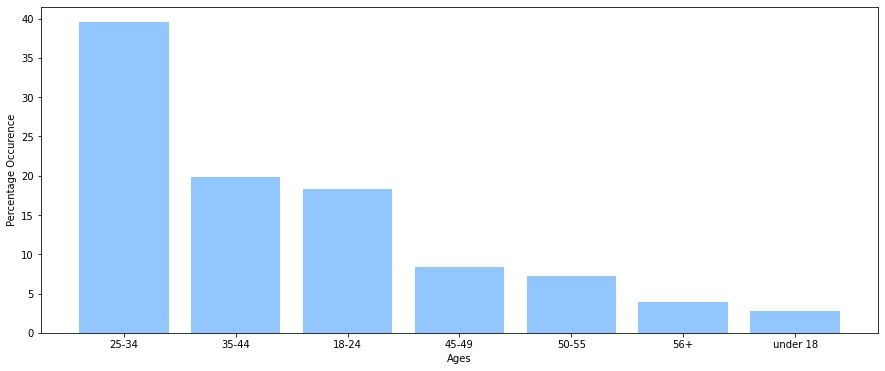

In [157]:
#1
fig=plt.figure(figsize=( 15 , 6 ))
plt.style.use('seaborn-pastel')

labels={1 : 'under 18' , 18 : '18-24' , 25 : '25-34' , 35 : '35-44' , 45 : '45-49' , 50 : '50-55' , 56 : '56+'}
master_data['age_names']=master_data['age'].map(labels)

display(master_data.head())

info=(master_data['age_names'].value_counts(normalize=True)*100).to_frame()
display(info)

plt.xlabel('Ages')
plt.ylabel('Percentage Occurence')
plt.bar(info.index , info['age_names']);


In [158]:
#explore3
# top 25 movie
movie_rating=master_data[['title','rating']].groupby('title').mean().sort_values('rating', ascending=False)
movie_rating.head(25)

,rating
title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


In [159]:
#explore 2
# toy story rating
movie_rating.loc[['Toy Story (1995)']]

,rating
title,
Toy Story (1995),4.146846


In [160]:
#explore 4
# userid 2696
master_data[master_data['userid']==2696]

,userid,gender,age,occupation,movieid,rating,title,genres,age_names
24345,2696,M,25,7,1270,2,Back to the Future (1985),Comedy|Sci-Fi,25-34
29848,2696,M,25,7,1097,3,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,25-34
244232,2696,M,25,7,1617,4,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,25-34
250014,2696,M,25,7,800,5,Lone Star (1996),Drama|Mystery,25-34
273633,2696,M,25,7,3386,1,JFK (1991),Drama|Mystery,25-34
277808,2696,M,25,7,3176,4,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller,25-34
371178,2696,M,25,7,1711,4,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery,25-34
377250,2696,M,25,7,1589,3,Cop Land (1997),Crime|Drama|Mystery,25-34
598042,2696,M,25,7,1783,4,Palmetto (1998),Film-Noir|Mystery|Thriller,25-34
603189,2696,M,25,7,1892,4,"Perfect Murder, A (1998)",Mystery|Thriller,25-34


In [161]:
movie['col_genre']=movie['genres'].apply(lambda x : str(x).split('|'))
movie.head()

,movieid,title,genres,col_genre
0,1,Toy Story (1995),Animation|Children's|Comed,"[Animation, Children's, Comed]"
1,2,Jumanji (1995),Adventure|Children's|Fantasy,"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama,"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [162]:
# feature engineering
# Find out all the unique genres
genres=[]
for i in movie['col_genre']:
    genres.extend(i)

genres=set(genres)
genres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comed',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [163]:
for i in genres:
    master_data[i]=master_data['genres'].apply(lambda x: 1 if i in x else 0)

master_data.head(1)

,userid,gender,age,occupation,movieid,rating,title,genres,age_names,Thriller,Musical,Animation,Western,Horror,Film-Noir,Comed,Children's,Adventure,War,Crime,Comedy,Documentary,Romance,Drama,Mystery,Action,Fantasy,Sci-Fi
0,1,F,1,10,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,under 18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [164]:
master_data.corr()

,userid,age,occupation,movieid,rating,Thriller,Musical,Animation,Western,Horror,Film-Noir,Comed,Children's,Adventure,War,Crime,Comedy,Documentary,Romance,Drama,Mystery,Action,Fantasy,Sci-Fi
userid,1.000000,0.034688,-0.026698,-0.017739,0.012303,-0.001107,-0.000222,-0.007665,0.004114,-0.001392,0.004701,-0.003651,-0.004862,-0.000683,0.003502,0.003469,-0.003730,-0.001064,0.006834,0.006572,0.004334,-0.002023,0.002212,-0.003283
age,0.034688,1.000000,0.078371,0.027575,0.056869,-0.014100,0.005158,-0.047020,0.038177,-0.023901,0.033495,-0.044046,-0.052858,-0.016730,0.038446,-0.007931,-0.043351,0.004407,0.017503,0.063856,0.024308,-0.030975,-0.024222,-0.010879
occupation,-0.026698,0.078371,1.000000,0.008585,0.006753,0.008981,-0.007312,-0.003834,0.005924,0.001439,0.005246,-0.006149,-0.006906,0.014309,0.010264,0.002821,-0.006178,-0.002689,-0.014018,-0.012326,0.002421,0.018347,0.001299,0.026250
movieid,-0.017739,0.027575,0.008585,1.000000,-0.064042,-0.058418,-0.059381,-0.014177,0.003940,0.057613,-0.019655,0.061667,-0.071589,-0.082413,-0.081951,-0.061896,0.069133,-0.009544,-0.118375,-0.030856,-0.028561,-0.042046,-0.018792,-0.011747
rating,0.012303,0.056869,0.006753,-0.064042,1.000000,-0.004806,0.015643,0.019670,0.007311,-0.094353,0.060259,-0.039622,-0.039829,-0.036718,0.075688,0.033446,-0.041870,0.028098,0.009644,0.122561,0.015848,-0.047633,-0.023312,-0.044487
Thriller,-0.001107,-0.014100,0.008981,-0.058418,-0.004806,1.000000,-0.100690,-0.085713,-0.058897,0.056629,0.115231,-0.299501,-0.132642,-0.038423,-0.088018,0.115095,-0.297794,-0.043191,-0.081384,-0.153717,0.225281,0.202756,-0.087374,0.102546
Musical,-0.000222,0.005158,-0.007312,-0.059381,0.015643,-0.100690,1.000000,0.335231,-0.030245,-0.018924,-0.028384,0.030566,0.312567,-0.022327,-0.034429,-0.061179,0.031509,-0.007155,0.023506,-0.094778,-0.042581,-0.100432,-0.020134,-0.068012
Animation,-0.007665,-0.047020,-0.003834,-0.014177,0.019670,-0.085713,0.335231,1.000000,-0.030908,-0.049730,0.037013,0.018544,0.576204,0.004732,-0.046114,-0.062520,-0.001842,-0.018991,-0.054540,-0.154479,-0.042488,-0.110294,0.012025,-0.055526
Western,0.004114,0.038177,0.005924,0.003940,0.007311,-0.058897,-0.030245,-0.030908,1.000000,-0.041784,-0.019816,0.007927,-0.031269,-0.011964,-0.019803,-0.042711,0.008568,-0.012974,-0.044650,-0.045945,-0.029727,0.022242,-0.028199,-0.010935
Horror,-0.001392,-0.023901,0.001439,0.057613,-0.094353,0.056629,-0.018924,-0.049730,-0.041784,1.000000,-0.039157,-0.093064,-0.077099,-0.057256,-0.077985,-0.047899,-0.091938,-0.025673,-0.099434,-0.189551,-0.002423,-0.042733,-0.055803,0.056505


In [165]:
master_data.corr()[['rating']].T

,userid,age,occupation,movieid,rating,Thriller,Musical,Animation,Western,Horror,Film-Noir,Comed,Children's,Adventure,War,Crime,Comedy,Documentary,Romance,Drama,Mystery,Action,Fantasy,Sci-Fi
rating,0.012303,0.056869,0.006753,-0.064042,1.0,-0.004806,0.015643,0.01967,0.007311,-0.094353,0.060259,-0.039622,-0.039829,-0.036718,0.075688,0.033446,-0.04187,0.028098,0.009644,0.122561,0.015848,-0.047633,-0.023312,-0.044487


In [166]:
master_data.columns

Index(['userid', 'gender', 'age', 'occupation', 'movieid', 'rating', 'title',
       'genres', 'age_names', 'Thriller', 'Musical', 'Animation', 'Western',
       'Horror', 'Film-Noir', 'Comed', 'Children's', 'Adventure', 'War',
       'Crime', 'Comedy', 'Documentary', 'Romance', 'Drama', 'Mystery',
       'Action', 'Fantasy', 'Sci-Fi'],
      dtype='object')

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [168]:
x=master_data[['age' , 'Animation' , 'Documentary' , 'Film-Noir' , 'Romance' , 'Horror' , 'Musical' , "Children's" , 'Action'
                , 'Adventure' , 'Crime' , 'Comedy' , 'Fantasy' , 'Sci-Fi' , 'Drama' , 'War' , 'Mystery' , 'Thriller' , 'Western']] # Target / label / X
y=master_data['rating'] #target / label / Y

In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [170]:
model=LinearRegression()

In [171]:
model.fit(x_train, y_train)

LinearRegression()

In [172]:
model.predict(x_test)

array([3.48397961, 3.3465457 , 3.90576651, ..., 3.56641681, 3.44321267,
       3.76792676])